# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Chain-links
Multibody dynamics modeling and numerical methods

## Double Pendulum

In [1]:
%matplotlib inline
import os
import numpy as np
from scipy.integrate import solve_ivp
from IPython.display import display, Markdown
import matplotlib as mpl
from Models.models import *
from utils.SolutionDemo import *
sp.init_printing()
mpl.rcParams['figure.dpi'] = 50
repo_dir = os.path.dirname(os.getcwd())

### Explicit Model

In [2]:
m=[1, 1]
l=[1, 1]
Twobar_Model = ExplictModel(m=m, l=l,close_chain=False)
y0 = [None, None, np.pi/6, None, None, -np.pi/6]
y_dot = [0, None, None, 0.5, None, None]
y = np.concatenate(Twobar_Model.initial_condition(y0, y_dot))
g = np.tile([0, -9.81, 0], len(m))
f = [0, 0, 0, 0, 0, 0]

### System constrains:

### System governing equations

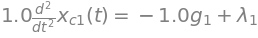

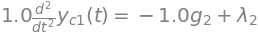

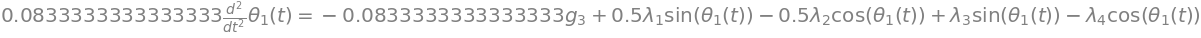

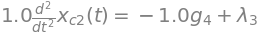

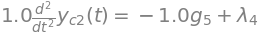

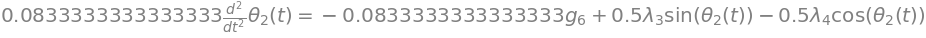

In [3]:
print_constrains(Twobar_Model)
print_govs(Twobar_Model, f)

In [3]:
ode = 'DOP853'
sol = solve_ivp(Twobar_Model.sim, [0, 10], y, method=ode, args=(f, g), t_eval=np.linspace(0, 10, 200))
Twobar = SolutionDemo(sol, m, l, rot=None)
multipliers = get_multipliers(Twobar_Model, f, g, sol, show=False)
print(Twobar.links.shape)

(2, 200, 2, 2)


In [4]:
gif = Twobar.animate(title=ode, interval=50, axis='off', save_as=repo_dir+'/imgs/DoublePendulum.gif')

In [5]:
Twobar.more_anim(multipliers, title='Double Pendulum', interval=50, save_as=repo_dir+'/imgs/DoublePendulum.mp4')

### Approximate Model

In [6]:
k = np.tile([1e6], 4)
Twobar_PModel = ApproximateModel(m=m, l=l, k=k, close_chain=False)
ode = 'DOP853'
solp = solve_ivp(Twobar_PModel.sim, [0, 10], y, method=ode, args=(f, g), t_eval=np.linspace(0, 10, 200))
Twobarp = SolutionDemo(solp, m, l, rot=None)
multipliers = get_multipliers(Twobar_PModel, f, g, solp, show=False)
print(Twobarp.links.shape)

(2, 200, 2, 2)


In [7]:
Twobar.more_anim(multipliers, title='Double Pendulum Approximated Model', interval=50, save_as=None)